# 📊 Fase 3 – Entrenamiento de Modelo DL (Continuación)

## 🎯 Objetivo
Construir un clasificador utilizando un modelo LSTM RNN optimizado con Nadam para diferenciar entre tráfico **normal** y **sospechoso** en redes monitoreadas, como parte del sistema modular de CiberVigIA, específicamente utilizando el dataset CIC.

## 🧠 Algoritmo sugerido
- **LSTM RNN con Nadam**: Adecuado para datos secuenciales como el tráfico de red, Nadam es un optimizador eficiente.

## ⚙️ Pasos técnicos

1. **Preparación del dataset (CIC)**
   - Cargar el dataset CIC (`/content/sample_data/cic_ids2017_clean.csv`).
   - Preprocesamiento del dataset para adecuarlo a la entrada de la red LSTM (normalización, posible secuenciación).
   - División en conjunto de entrenamiento y prueba (80/20).
   - Separación de variables predictoras (`X`) y etiqueta (`y`).
2. **Construcción y entrenamiento del modelo LSTM RNN**
   - Definir la arquitectura del modelo LSTM (capas, unidades, activación).
   - Compilar el modelo con la función de pérdida adecuada (binary crossentropy) y el optimizador Nadam.
   - Entrenar el modelo con los datos de entrenamiento.

3. **Evaluación del modelo**
   - Evaluar el rendimiento del modelo en el conjunto de prueba.
   - Calcular métricas relevantes (accuracy, precision, recall, F1-score).

4. **Persistencia del modelo**
   - Guardar el modelo entrenado para futuras fases.

## 📦 Entregable

Modelo entrenado con un rendimiento aceptable sobre el conjunto de prueba, documentando la arquitectura, hiperparámetros y métricas obtenidas.

> 💡 *Nota técnica: Para datasets desbalanceados, considera aplicar técnicas como el ajuste de pesos de clase durante el entrenamiento del modelo LSTM.*

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.utils import to_categorical
import gc  # Para liberar memoria

df = pd.read_csv('D:/Documentos/GitHub/CiberVigIA-2025B/datasets/data/processed/cic_ids2017_clean.csv')
print("Forma del dataset preprocesado:", df.shape)
print("Balance de labels:", df['Label'].value_counts())

y = df['Label']
X = df.drop('Label', axis=1)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)
num_classes = len(le.classes_)
y_categorical = to_categorical(y_encoded, num_classes=num_classes)
print("Clases en orden encoded (0 a n):", le.classes_)
label_for_0 = le.inverse_transform([0])[0]
print("Vector 0 corresponde a:", label_for_0)

X_np = X.values  # A numpy
X_reshaped = X_np.reshape((X_np.shape[0], 1, X_np.shape[1]))

X_train, X_temp, y_train, y_temp = train_test_split(X_reshaped, y_categorical, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
print("Formas: Train", X_train.shape, "Val", X_val.shape, "Test", X_test.shape)

gc.collect()

model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=64, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=num_classes, activation='softmax'))

optimizer = Nadam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

history = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_data=(X_val, y_val), verbose=1)

Forma del dataset preprocesado: (6771538, 79)
Balance de labels: Label
Heartbleed                    2367953
BENIGN                        2367953
SSH-Patator                    296766
DoS GoldenEye                  248503
PortScan                       223943
Infiltration                   199964
Bot                            198047
DoS Hulk                       172849
FTP-Patator                    143176
DDoS                           130288
Web Attack � Sql Injection      98545
Web Attack � Brute Force        97866
DoS slowloris                   90639
DoS Slowhttptest                86492
Web Attack � XSS                48554
Name: count, dtype: int64
Clases en orden encoded (0 a n): ['BENIGN' 'Bot' 'DDoS' 'DoS GoldenEye' 'DoS Hulk' 'DoS Slowhttptest'
 'DoS slowloris' 'FTP-Patator' 'Heartbleed' 'Infiltration' 'PortScan'
 'SSH-Patator' 'Web Attack � Brute Force' 'Web Attack � Sql Injection'
 'Web Attack � XSS']
Vector 0 corresponde a: BENIGN
Formas: Train (4740076, 1, 78) Val (10

D:\Documentos\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 1, 64)               │          36,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 15)                  │             495 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 72,207 (282.06 KB)

 Trainable params: 72,207 (282.06 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
37032/37032 ━━━━━━━━━━━━━━━━━━━━ 109s 3ms/step - accuracy: 0.9626 - loss: 0.0969 - val_accuracy: 0.9717 - val_loss: 0.0630
Epoch 2/20
37032/37032 ━━━━━━━━━━━━━━━━━━━━ 92s 2ms/step - accuracy: 0.9719 - loss: 0.0653 - val_accuracy: 0.9751 - val_loss: 0.0569
Epoch 3/20
37032/37032 ━━━━━━━━━━━━━━━━━━━━ 91s 2ms/step - accuracy: 0.9745 - loss: 0.0595 - val_accuracy: 0.9769 - val_loss: 0.0529
Epoch 4/20
37032/37032 ━━━━━━━━━━━━━━━━━━━━ 92s 2ms/step - accuracy: 0.9760 - loss: 0.0562 - val_accuracy: 0.9786 - val_loss: 0.0497
Epoch 5/20
37032/37032 ━━━━━━━━━━━━━━━━━━━━ 93s 3ms/step - accuracy: 0.9768 - loss: 0.0544 - val_accuracy: 0.9788 - val_loss: 0.0487
Epoch 6/20
37032/37032 ━━━━━━━━━━━━━━━━━━━━ 96s 3ms/step - accuracy: 0.9773 - loss: 0.0531 - val_accuracy: 0.9794 - val_loss: 0.0473
Epoch 7/20
37032/37032 ━━━━━━━━━━━━━━━━━━━━ 92s 2ms/step - accuracy: 0.9777 - loss: 0.0521 - val_accuracy: 0.9784 - val_loss: 0.0485
Epoch 8/20
37032/37032 ━━━━━━━━━━━━━━━━━━━━ 94s 3ms/step - accuracy:

### Paso 2: Preparar datos

In [ ]:
y = df['Label']
X = df.drop('Label', axis=1)

Encoding para el label

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)
num_classes = len(le.classes_)
y_categorical = to_categorical(y_encoded, num_classes=num_classes)
print("Clases en orden encoded (0 a n):", le.classes_)
label_for_0 = le.inverse_transform([0])[0]
print("Vector 0 corresponde a:", label_for_0)

Reshape para LSTM (3D: samples, timesteps=1, features)

In [ ]:
X_np = X.values  # A numpy
X_reshaped = X_np.reshape((X_np.shape[0], 1, X_np.shape[1]))

Split train/test/validation

In [4]:
X_train, X_temp, y_train, y_temp = train_test_split(X_reshaped, y_categorical, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
print("Formas: Train", X_train.shape, "Val", X_val.shape, "Test", X_test.shape)

NameError: name 'X_reshaped' is not defined

In [ ]:
gc.collect()

### Paso 3: Construir Modelo LSTM RNN

In [ ]:
model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=64, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=num_classes, activation='softmax'))

Optimizador Nadam

In [ ]:
optimizer = Nadam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

Resumen

In [ ]:
model.summary()

### Paso 4: Entrenar

In [5]:
history = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_data=(X_val, y_val), verbose=1)

NameError: name 'model' is not defined

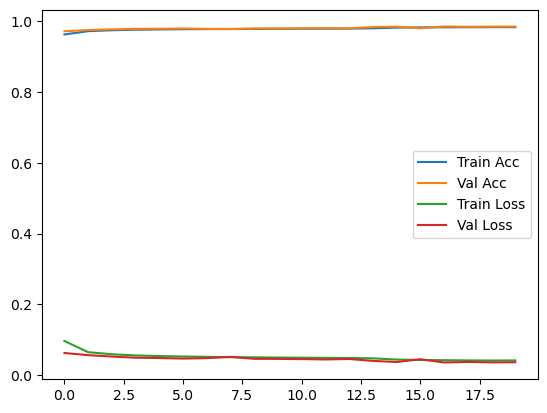

In [2]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend(); plt.show()

In [3]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

31742/31742 ━━━━━━━━━━━━━━━━━━━━ 27s 831us/step


              precision    recall  f1-score   support

           0       1.00      0.99      0.99    355565
           1       0.93      0.99      0.96     29492
           2       1.00      1.00      1.00     19675
           3       1.00      1.00      1.00     37254
           4       0.99      0.98      0.99     26056
           5       0.99      0.99      0.99     13064
           6       0.99      0.99      0.99     13524
           7       1.00      1.00      1.00     21610
           8       1.00      1.00      1.00    354992
           9       1.00      1.00      1.00     29680
          10       0.94      0.97      0.95     33781
          11       1.00      0.96      0.98     44256
          12       0.64      0.96      0.77     14607
          13       0.90      0.96      0.93     14785
          14       0.96      0.07      0.12      7390

    accuracy                           0.99   1015731
   macro avg       0.96      0.93      0.91   1015731
weighted avg       0.99   

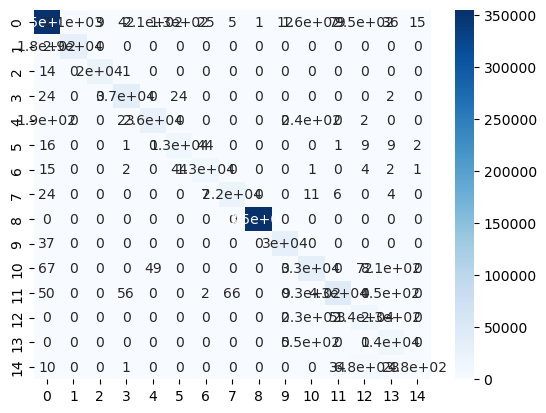

In [4]:
print(classification_report(y_test_classes, y_pred_classes))
cm = confusion_matrix(y_test_classes, y_pred_classes)
sns.heatmap(cm, annot=True, cmap='Blues'); plt.show()

In [7]:
model.save('…/models/lstm_nadam_cic.keras')
print("Modelo guardado.")

Modelo guardado.
